- Baixar os dados do database do Kaggle sobre os arremessos do Kobe Bryant e criar um dataframe de pandas

- (Dica monte o Drive do Google)

- Conte quantos arremessos foram convertidos (shot_made_flag)

- Calcule qual foi a taxa de sucesso (eficiência) para todos os arremessos (total de arremessos covertidos/ total de arremessos feitos)

- Qual foi o arremesso convertido mais distante?

- Qual a distância média dos arremessos convertidos? Qual a distância média dos arremessos não-convertidos?

- Qual o quarto do jogo que o Kobe Bryant é mais eficiente?

- Agrupe pelo tipo de arremesso e descubra qual tipo de arremesso que o Kobe Bryant é mais eficiente.

- Qual foi a melhor temporada do Kobe Bryant em relação a percentual de cestas convertidas?

- Agrupe pela temporada e pelo tipo de arremesso

- Faça dois gráficos: posição em quadra dos arremessos perdidos x posição em quadra dos arremessos acertados


In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive

import matplotlib.pyplot as plt


In [ ]:
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Colab/Files/kobe_bryant_shots_data.csv'

Mounted at /content/drive


In [ ]:
kobe = pd.read_csv(path)

In [ ]:
kobe.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

In [ ]:
kobe.isnull().sum()

action_type              0
combined_shot_type       0
game_event_id            0
game_id                  0
lat                      0
loc_x                    0
loc_y                    0
lon                      0
minutes_remaining        0
period                   0
playoffs                 0
season                   0
seconds_remaining        0
shot_distance            0
shot_made_flag        5000
shot_type                0
shot_zone_area           0
shot_zone_basic          0
shot_zone_range          0
team_id                  0
team_name                0
game_date                0
matchup                  0
opponent                 0
shot_id                  0
dtype: int64

In [ ]:
# 1- Conte quantos arremessos foram convertidos;

kobe['shot_made_flag'].value_counts()

0.0    14232
1.0    11465
Name: shot_made_flag, dtype: int64

In [ ]:
# 2- Calcule qual foi a taxa de sucesso para todos os arremessos;

#11465/(11465 + 14232)

acertos = kobe[kobe['shot_made_flag']==1]
erros = kobe[kobe['shot_made_flag']==0]
taxa_sucesso = len(acertos) / (len(acertos) + len(erros)) * 100
taxa_sucesso


44.61610304704829

In [ ]:
kobe['shot_made_flag'].value_counts(normalize=True) * 100


0.0    55.383897
1.0    44.616103
Name: shot_made_flag, dtype: float64

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
kobe.head()

In [ ]:
# 3- Qual foi o arremesso convertido mais distante?

kobe.groupby('shot_made_flag')['shot_distance'].max().reset_index()

,shot_made_flag,shot_distance
0,0.0,79
1,1.0,43


In [ ]:
# 4- Qual a distância média dos arremessos convertidos? E dos não-convertidos?

kobe.groupby('shot_made_flag')['shot_distance'].mean().reset_index()

,shot_made_flag,shot_distance
0,0.0,15.127600
1,1.0,11.383428


In [ ]:
kobe.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

In [ ]:
# 5- Qual o quarto do jogo que o Kobe Bryant é mais eficiente?

acertos.groupby('period')['shot_made_flag'].count().reset_index()

,period,shot_made_flag
0,1,3120
1,2,2529
2,3,3175
3,4,2500
4,5,124
5,6,14
6,7,3


In [ ]:
# 6- Agrupe pelo tipo de arremesso e descubra qual tipo de arremesso que o Kobe Bryant é mais eficiente;

acertos.groupby('shot_type')['shot_made_flag'].count().reset_index()

,shot_type,shot_made_flag
0,2PT Field Goal,9683
1,3PT Field Goal,1782


In [ ]:
kobe.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

In [ ]:
# Qual foi a melhor temporada do Kobe Bryant em relação a percentual de cestas convertidas?

shots_by_season = kobe['season'].value_counts()

In [ ]:
acertos_by_season = acertos['season'].value_counts()

In [ ]:
pct = (acertos_by_season / shots_by_season) *100

In [ ]:
pct.sort_values(ascending=False)

2007-08    39.572689
2000-01    39.346895
2009-10    38.653846
2008-09    38.626227
2001-02    38.609467
2006-07    38.314785
1999-00    38.300571
2012-13    38.166981
1998-99    38.110749
2005-06    37.661777
2010-11    37.205479
2004-05    37.160121
2011-12    36.835675
2003-04    36.263736
2002-03    36.055332
1997-98    35.288170
1996-97    33.962264
2013-14    32.876712
2014-15    31.276297
2015-16    29.829290
Name: season, dtype: float64

In [ ]:
# Agrupe pela temporada e pelo tipo de arremesso


In [ ]:
kobe.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

In [ ]:
kobe['shot_type']

0        2PT Field Goal
1        2PT Field Goal
2        2PT Field Goal
3        2PT Field Goal
4        2PT Field Goal
              ...      
30692    2PT Field Goal
30693    2PT Field Goal
30694    2PT Field Goal
30695    3PT Field Goal
30696    2PT Field Goal
Name: shot_type, Length: 30697, dtype: object

In [ ]:
season_by_shot_type = kobe.groupby(['season', 'shot_type'])

In [ ]:
season_by_shot_type.head()

In [ ]:
pd.set_option('display.max_columns', None)


In [ ]:
kobe.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

In [ ]:
kobe[['combined_shot_type','loc_x', 'loc_y','shot_zone_basic','shot_zone_area','shot_zone_range']]

,combined_shot_type,loc_x,loc_y,shot_zone_basic,shot_zone_area,shot_zone_range
0,Jump Shot,167,72,Mid-Range,Right Side(R),16-24 ft.
1,Jump Shot,-157,0,Mid-Range,Left Side(L),8-16 ft.
2,Jump Shot,-101,135,Mid-Range,Left Side Center(LC),16-24 ft.
3,Jump Shot,138,175,Mid-Range,Right Side Center(RC),16-24 ft.
4,Dunk,0,0,Restricted Area,Center(C),Less Than 8 ft.
...,...,...,...,...,...,...
30692,Jump Shot,1,48,In The Paint (Non-RA),Center(C),Less Than 8 ft.
30693,Tip Shot,0,0,Restricted Area,Center(C),Less Than 8 ft.
30694,Jump Shot,-134,166,Mid-Range,Left Side Center(LC),16-24 ft.
30695,Jump Shot,31,267,Above the Break 3,Center(C),24+ ft.


In [ ]:
acertos.head(2)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [ ]:
# Faça dois gráficos: posição em quadra dos arremessos perdidos x posição em quadra dos arremessos acertados

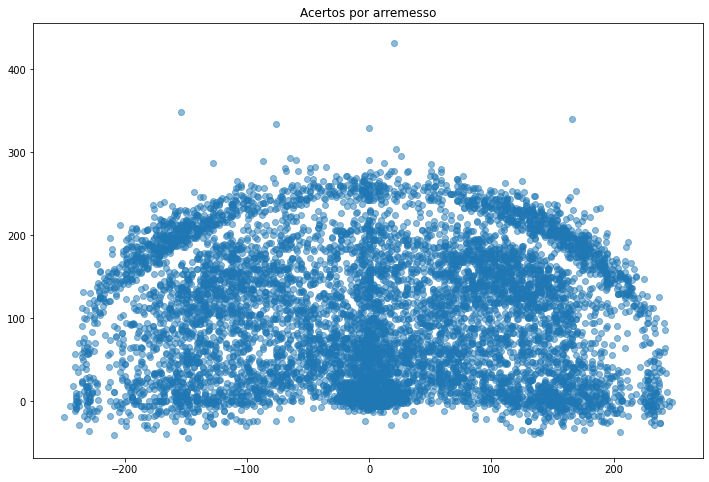

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(x='loc_x',y='loc_y', data=acertos, alpha=0.5)
plt.title('Acertos por arremesso')
plt.show()

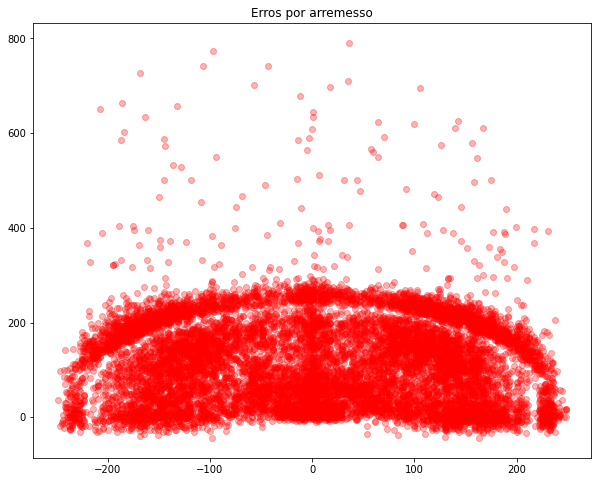

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x='loc_x',y='loc_y', data=erros, c='r', alpha=0.3)
plt.title('Erros por arremesso')
plt.show()